In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
cv2.__version__
#Anna Meleshko 319346045

'4.1.2'

--2020-04-11 20:11:48--  https://www.essentiallysports.com/wp-content/uploads/IMG_20191230_233458.jpg
Resolving www.essentiallysports.com (www.essentiallysports.com)... 54.192.160.7, 54.192.160.92, 54.192.160.123, ...
Connecting to www.essentiallysports.com (www.essentiallysports.com)|54.192.160.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79432 (78K) [image/jpeg]
Saving to: ‘input.jpg’

input.jpg           100%[===================>]  77.57K  --.-KB/s    in 0.06s   

2020-04-11 20:11:49 (1.33 MB/s) - ‘input.jpg’ saved [79432/79432]



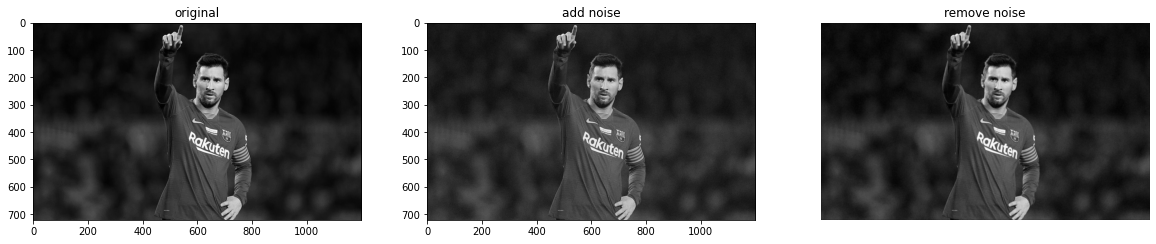

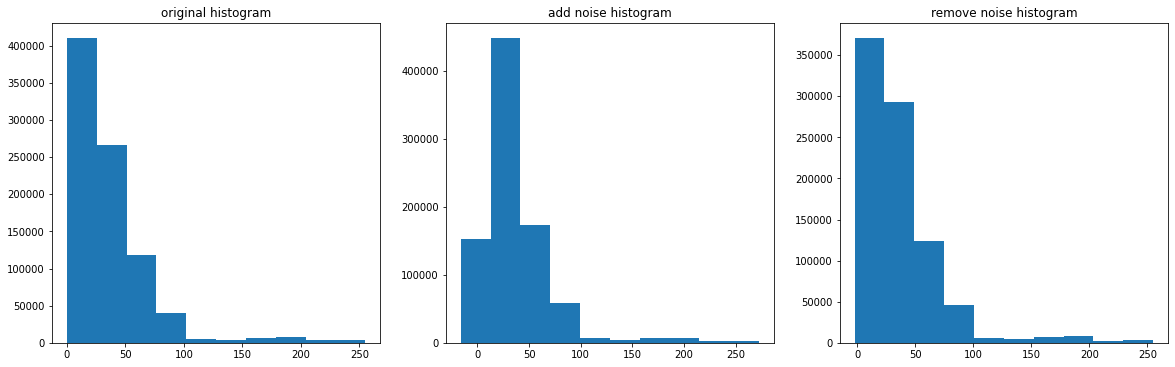

The MSE is : 28.159248916105568


In [2]:
!wget https://www.essentiallysports.com/wp-content/uploads/IMG_20191230_233458.jpg -O input.jpg
image =cv2.imread('input.jpg')
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
plt.figure(figsize=[20,20])
plt.subplot(331)
plt.title('original')
plt.imshow(gray,cmap ='gray')

def noisy(image):
    mean = 0
    deviation =5
    gauss = np.random.normal(mean,deviation,image.shape)
    noisy = image + gauss
    return noisy

#addnoise
noisy_img = noisy(gray)
plt.subplot(332)
plt.title('add noise')
plt.imshow(noisy_img,cmap = 'gray')

#remove noise
import scipy.signal
kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])/9
# kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])/16
image_kernel = scipy.signal.convolve2d(noisy_img, kernel, 'same')
plt.subplot(333)
plt.title('remove noise')
plt.imshow(image_kernel, cmap='gray')
plt.axis('off')
plt.show()

#compare histograms
plt.figure(figsize=[20,20])
plt.subplot(334)
plt.title('original histogram')
plt.hist(gray.ravel())
plt.subplot(335)
plt.title('add noise histogram')
plt.hist(noisy_img.ravel())
plt.subplot(336)
plt.title('remove noise histogram')
plt.hist(image_kernel.ravel())
plt.show()

#show difference
diff = abs(gray-image_kernel)
mse = np.square(diff).mean() 
print("The MSE is :",mse)


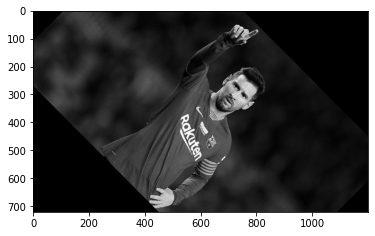

In [3]:
def rotate_image(image,angle):
  rows,cols = image.shape[0],image.shape[1]
  rotated_img = np.zeros_like(image)
  center_row = int(rows/2)
  center_col = int(cols/2)
  for r in range(rows):
    for c in range(cols):
      dist = np.sqrt(np.square(r-center_row)+np.square(c-center_col)) #euclidean distance between the current pixel to the center
      pixel_angle = np.arctan2((r-center_row),(c-center_col))-np.radians(angle)  #the new angle for the pixel in the new image 
      new_row = int(np.sin(pixel_angle)*dist)+center_row #
      new_col = int(np.cos(pixel_angle)*dist)+center_col #new location for the pixel in rotated img
      if new_row >= rows or new_col >= cols or new_row <0 or new_col < 0: #check if the new loc is outside the frame(original size) 
        continue
      rotated_img[r][c] = image[new_row][new_col]
  return rotated_img
  

rotated = rotate_image(gray,45)
plt.imshow(rotated,cmap = 'gray')


#1.Augmentation class

In [0]:
class Augmentation(object):

  def __init__(self,image):
    self.image = image
    self.flipped_img = None
    self.rotated_img = None
    self.gauss_img = None
    self.median_img = None
    self.zoom_img = None
    self.crop_img = None

  def flip(self, image ,vertical = False):
    if vertical:
      self.flipped_img = cv2.flip(self.image, 0)
    if not vertical:
      self.flipped_img = cv2.flip(self.image, 1)
    return self.flipped_img

  def rotate(self, image, angle :float):
    self.rotated_img = rotate_image(image, angle)
    return self.rotated_img

  def gaussian_Blur(self, image, k_size:int , sigmax :int ):
    self.gauss_img = cv2.GaussianBlur(image,k_size,sigmax,cv2.BORDER_DEFAULT)
    return self.gauss_img

  def median_Blur(self, image, k_size: int):
    self.median_img = cv2.medianBlur(image,k_size)
    return self.median_img

  def zoom(self, image, dsize: tuple, sizeOfZoom):
    width, height = dsize[0] ,dsize[1]
    center_y, center_x = int(height /2) ,int(width/2) 
    new_locy, new_locx = int(center_y/sizeOfZoom), int(center_x/sizeOfZoom)
    y_low, x_low = center_y - new_locy, center_x - new_locx 
    y_high, x_high = center_y + new_locy, center_x + new_locx 
    self.zoom_img = self.image[y_low: y_high, x_low: x_high]
    self.zoom_img = cv2.resize(self.zoom_img, (width, height), cv2.INTER_LINEAR)
    return self.zoom_img

  def crop(self, image, low_y, high_y, low_x, high_x):
    self.crop_img = image[low_y : high_y, low_x : high_x]
    return self.crop_img



###flip & rotate

--2020-04-11 20:12:38--  https://e00-marca.uecdn.es/assets/multimedia/imagenes/2018/10/17/15398033229721.jpg
Resolving e00-marca.uecdn.es (e00-marca.uecdn.es)... 54.230.75.82, 54.230.75.49, 54.230.75.127, ...
Connecting to e00-marca.uecdn.es (e00-marca.uecdn.es)|54.230.75.82|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 82130 (80K) [image/jpeg]
Saving to: ‘messi.jpg’

messi.jpg           100%[===================>]  80.21K  --.-KB/s    in 0.09s   

2020-04-11 20:12:39 (907 KB/s) - ‘messi.jpg’ saved [82130/82130]



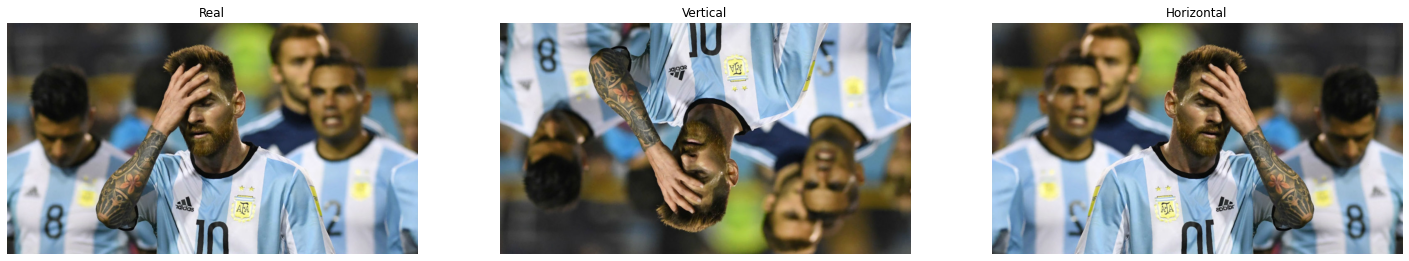

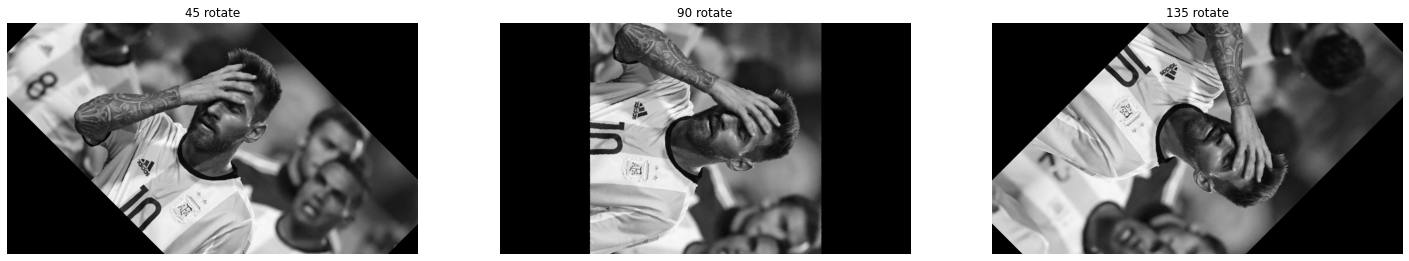

In [6]:
!wget https://e00-marca.uecdn.es/assets/multimedia/imagenes/2018/10/17/15398033229721.jpg -O messi.jpg
image =cv2.imread('messi.jpg')
img = cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
augment = Augmentation(img)

#flip img
flipped_vert = augment.flip(img,vertical = True)
flipped_horz = augment.flip(img,vertical = False)
plt.figure(figsize=[25,10])
plt.subplot(131)
plt.imshow(img)
plt.title('Real')
plt.axis('off')
plt.subplot(132)
plt.imshow(flipped_vert)
plt.title('Vertical')
plt.axis('off')
plt.subplot(133)
plt.imshow(flipped_horz)
plt.title("Horizontal")
plt.axis('off')
plt.show()


#rotate img
gray =cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
rotate1 = augment.rotate(gray,45)
rotate2 = augment.rotate(gray,90)
rotate3 = augment.rotate(gray,135)
plt.figure(figsize=[25,10])
plt.subplot(131)
plt.imshow(rotate1,cmap = 'gray')
plt.title('45 rotate')
plt.axis('off')
plt.subplot(132)
plt.imshow(rotate2 ,cmap = 'gray')
plt.title('90 rotate')
plt.axis('off')
plt.subplot(133)
plt.imshow(rotate3 ,cmap = 'gray')
plt.title("135 rotate")
plt.axis('off')
plt.show()


###Median & Gaussian Blur

(-0.5, 989.5, 556.5, -0.5)

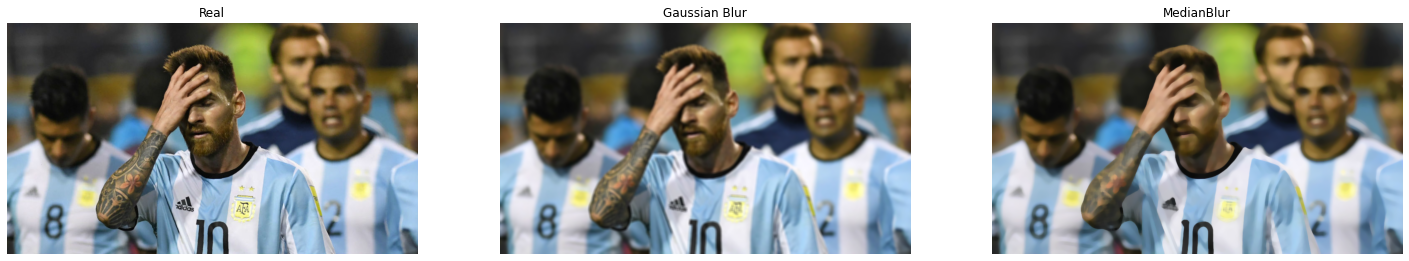

In [7]:
#Gaussian Blur
gaussian_b = augment.gaussian_Blur(img, (7,7), 50)
plt.figure(figsize=[25, 10])
plt.subplot(131)
plt.imshow(img)
plt.title('Real')
plt.axis('off')
plt.subplot(132)
plt.imshow(gaussian_b)
plt.title('Gaussian Blur')
plt.axis('off')

#Median Blur
median_b = augment.median_Blur(img, 11)
plt.subplot(133)
plt.imshow(median_b)
plt.title('MedianBlur')
plt.axis('off')


###Zoom & Crop

(220, 380, 3)


Text(0.5, 1.0, 'Cropped')

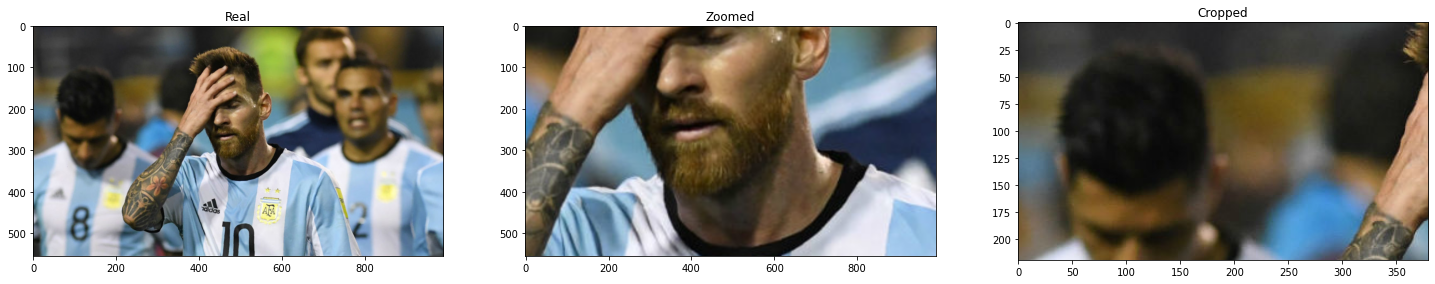

In [8]:
#Zoom
zoomed_img = augment.zoom(img,(img.shape[1],img.shape[0]),3)
cropped_img = augment.crop(img,80,300,20,400)
plt.figure(figsize=[25, 10])
plt.subplot(131)
plt.imshow(img)
plt.title('Real')
plt.subplot(132)
plt.imshow(zoomed_img)
plt.title('Zoomed')
plt.subplot(133)
plt.imshow(cropped_img)
plt.title('Cropped')


##2.Augmentation by probability

--2020-04-11 20:34:46--  https://s3.envato.com/files/247908767/_MG_7660_CM.jpg
Resolving s3.envato.com (s3.envato.com)... 13.226.45.54, 13.226.45.20, 13.226.45.107, ...
Connecting to s3.envato.com (s3.envato.com)|13.226.45.54|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 204699 (200K) [image/jpeg]
Saving to: ‘stop.jpg’

stop.jpg            100%[===================>] 199.90K  --.-KB/s    in 0.1s    

2020-04-11 20:34:46 (1.86 MB/s) - ‘stop.jpg’ saved [204699/204699]

(33, 205, 3)
(21, 41, 3)
(60, 287, 3)


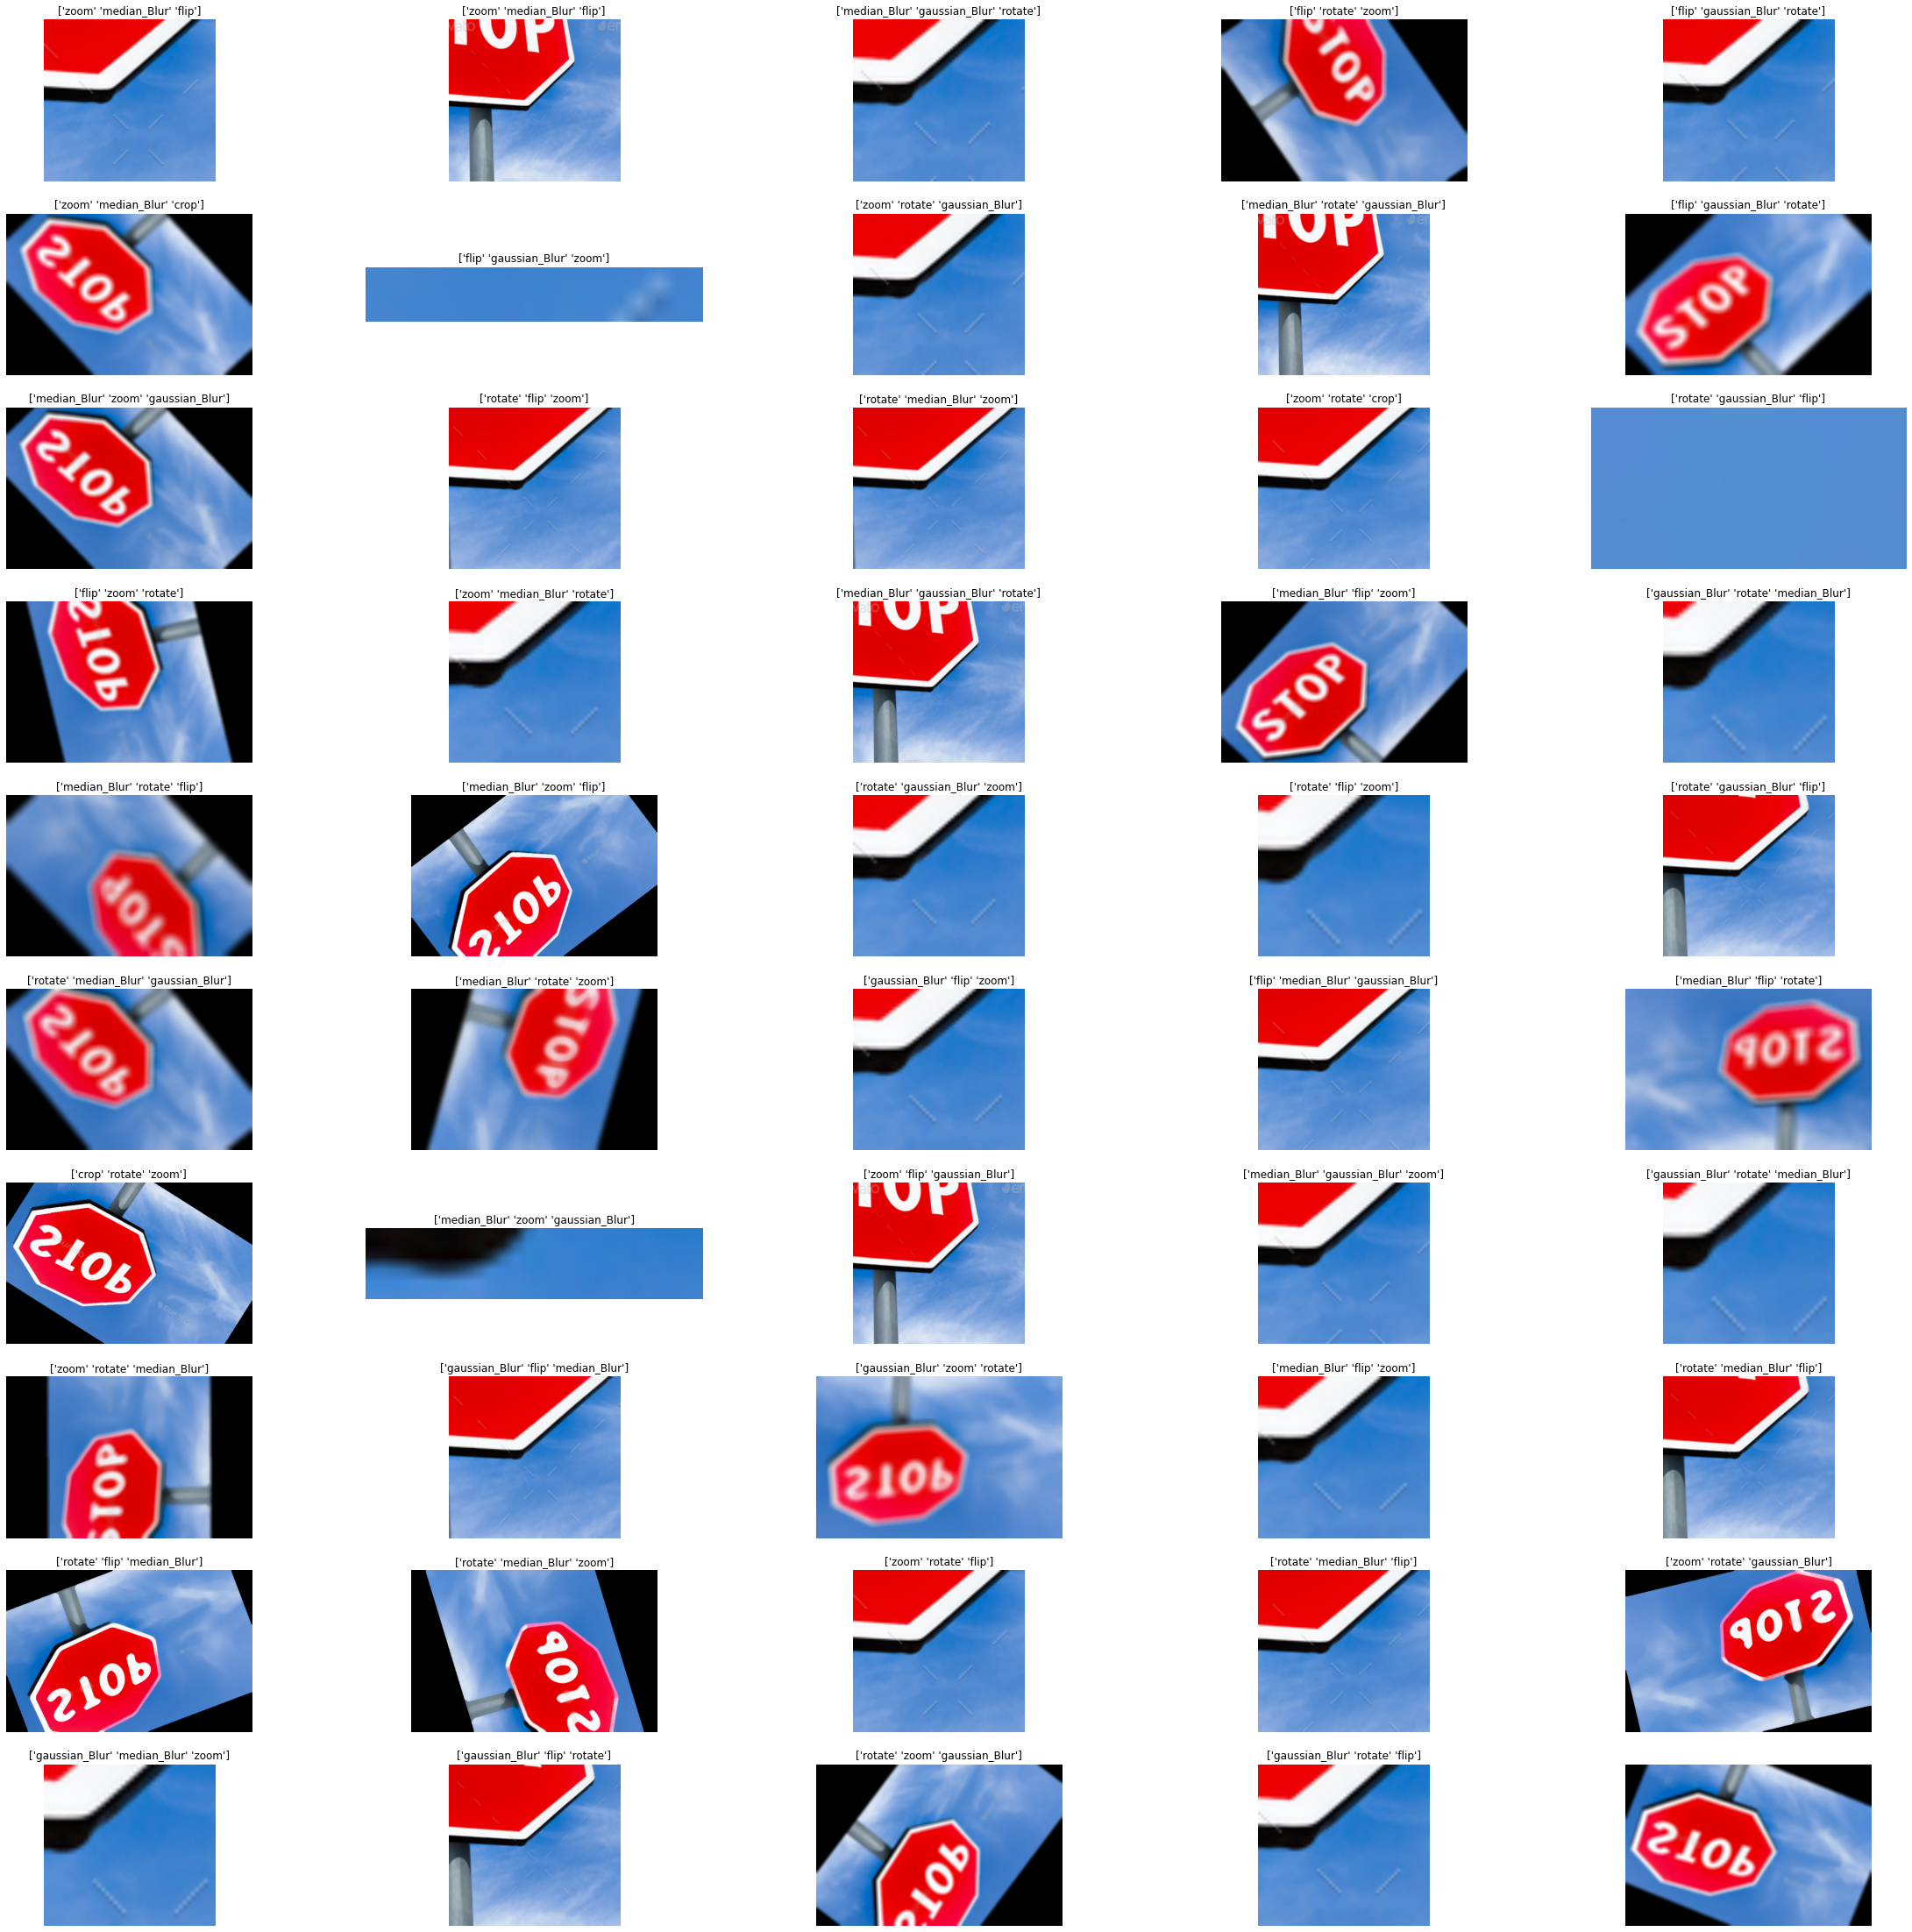

In [12]:
class ManyAugmentation(Augmentation):
  
  def __init__(self,image ,N:int , M :list):
    self.image = image
    self.N = N
    self.M = M

  def make_augmantations(self, image, all_augmantations):
    if 'flip' in all_augmantations :
      verticaly = np.random.choice([True,False] ,1, replace =False , p=[0.5,0.5])
      image = super().flip(image ,verticaly[0])
    if 'rotate' in all_augmantations :
      r_angle = np.random.uniform(0,360)
      image = super().rotate(image,r_angle)
    if 'gaussian_Blur' in all_augmantations :
      ksize = (np.random.randint(1,13,None))*2 + 1
      size = (ksize,ksize)
      sigma = np.random.randint(1,61,None)
      image = super().gaussian_Blur(image, size, sigma)
    if 'median_Blur' in all_augmantations :
      ksize = (np.random.randint(1,13,None))*2 + 1
      image = super().median_Blur(image,ksize)
    if 'zoom' in all_augmantations :
      zoom_size = np.random.randint(2,15,None)
      image = super().zoom(image, (image.shape[1],img.shape[0]), zoom_size)
    if 'crop' in all_augmantations :
      lowx = np.random.randint(50,image.shape[1],None) 
      lowy = np.random.randint(50,image.shape[0],None) 
      highx = np.random.randint(lowx + 1,image.shape[1],None) 
      highy = np.random.randint(lowy + 1,image.shape[0],None) 
      image = super().crop(image, lowy, highy ,lowx ,highx)
    return image

  def which_augment(self,all_augmants):
      choose = np.random.choice(all_augmants, self.N ,replace = False, p=self.M)
      copy_img = self.make_augmantations(self.image.copy(),choose)
      return copy_img ,choose
      
  def create_augmented_images(self,num_of_imgs):
    lst = []
    titles = []
    plt.figure(figsize=[40, 40])
    for idx in range(num_of_imgs):
      which , choose = self.which_augment(['flip','rotate','gaussian_Blur','median_Blur','zoom','crop'])
      lst.append(which)
      titles.append(choose) 
    for idx,image in enumerate(lst):
      plt.title(f'{titles[idx]}')  
      plt.subplot(10, 5, idx + 1)
      plt.imshow(image)
      plt.axis('off')
    plt.show()



!wget https://s3.envato.com/files/247908767/_MG_7660_CM.jpg -O stop.jpg
image =cv2.imread('stop.jpg')
stop_img= cv2.cvtColor(image,cv2.COLOR_RGB2BGR)
augment = ManyAugmentation(stop_img, 3, [0.19,0.2,0.2,0.2,0.2,0.01]) 
augment.create_augmented_images(50)
